## 💾 The data
The team has already tested more than a thousand samples ([source](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)):

#### Compressive strength data:
- "cement" - Portland cement in kg/m3
- "slag" - Blast furnace slag in kg/m3
- "fly_ash" - Fly ash in kg/m3
- "water" - Water in liters/m3
- "superplasticizer" - Superplasticizer additive in kg/m3
- "coarse_aggregate" - Coarse aggregate (gravel) in kg/m3
- "fine_aggregate" - Fine aggregate (sand) in kg/m3
- "age" - Age of the sample in days
- "strength" - Concrete compressive strength in megapascals (MPa)

***Acknowledgments**: I-Cheng Yeh, "Modeling of strength of high-performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)*.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/concrete_data.csv')
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.isna().sum()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64

In [ ]:
df.describe()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,norm_slag,norm_fly_ash,norm_superplasticizer,norm_age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836,2.553757,2.138371,1.454741,3.242209
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679,2.411720,2.375088,1.154941,1.110431
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.000000,0.000000,0.000000,0.693147
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115,0.000000,0.000000,0.000000,2.079442
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774,3.135494,0.000000,1.994700,3.367296
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287,4.969466,4.781390,2.412336,4.043051
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225,5.887215,5.303802,3.502550,5.902633


In [ ]:
df.strength.groupby(df['age']).mean().loc[[1,7,14,28]]

age
1      9.452716
7     26.050623
14    28.751038
28    36.748480
Name: strength, dtype: float64

In [ ]:
features = ["cement", "slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age"]
data = df[features]
y = df.strength


In [ ]:
from scipy.stats import skew
import seaborn as sns

cement



0.5087751165101829


<Figure size 432x288 with 0 Axes>

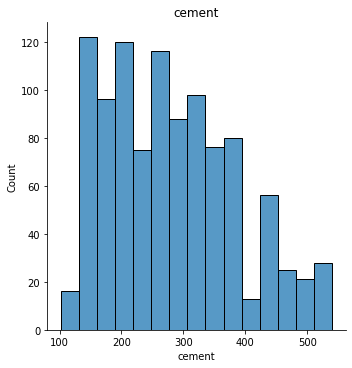

slag



0.7995707590007078


<Figure size 432x288 with 0 Axes>

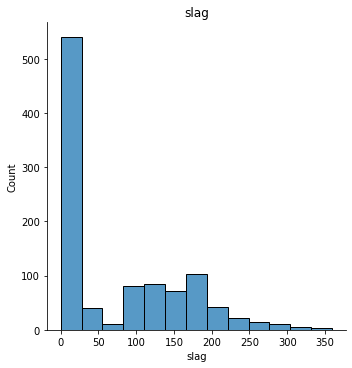

fly_ash



0.5366621062585285


<Figure size 432x288 with 0 Axes>

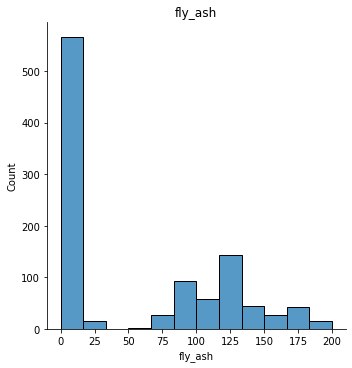

water



0.07421569280017443


<Figure size 432x288 with 0 Axes>

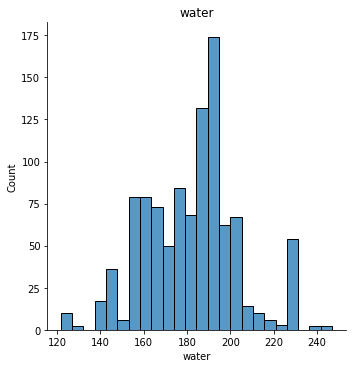

superplasticizer



0.9067897018739918


<Figure size 432x288 with 0 Axes>

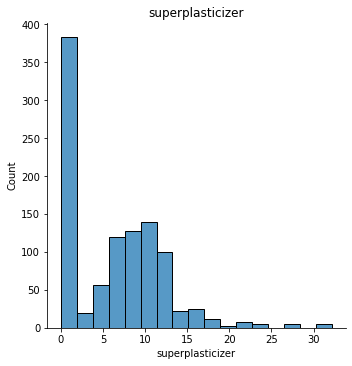

coarse_aggregate



-0.04014782595005173


<Figure size 432x288 with 0 Axes>

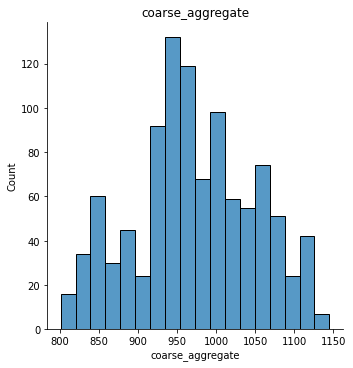

fine_aggregate



-0.252610731857911


<Figure size 432x288 with 0 Axes>

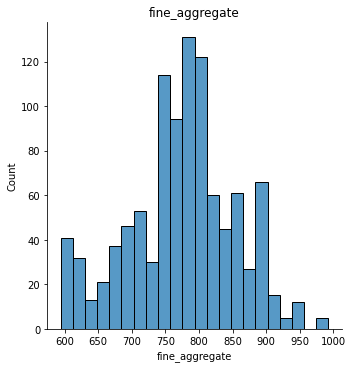

age



3.264414535416806


<Figure size 432x288 with 0 Axes>

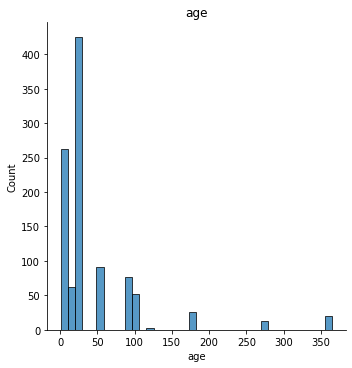

In [ ]:
for i in data.columns:
    print(i)
    print(skew(data[i]))
    
    plt.figure()
    sns.displot(data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

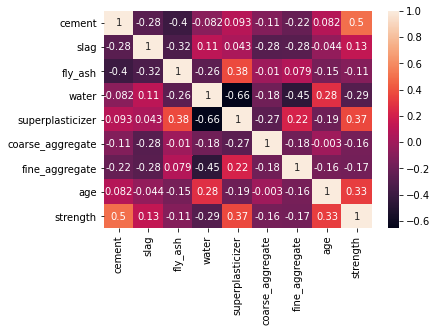

In [ ]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

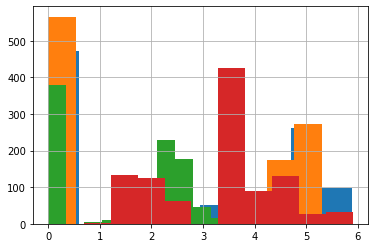

In [ ]:
df['norm_slag'] = np.log(df.slag+1)
df['norm_fly_ash'] = np.log(df.fly_ash+1)
df['norm_superplasticizer'] = np.log(df.superplasticizer+1)
df['norm_age'] = np.log(df.age+1)

df['norm_slag'].hist()
df['norm_fly_ash'].hist()
df['norm_superplasticizer'].hist()
df['norm_age'].hist()

In [ ]:
norm_features = ["cement", "norm_slag", "norm_fly_ash", "water", "norm_superplasticizer", "coarse_aggregate", "fine_aggregate", "norm_age"]
X = df[norm_features]
y = df.strength

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

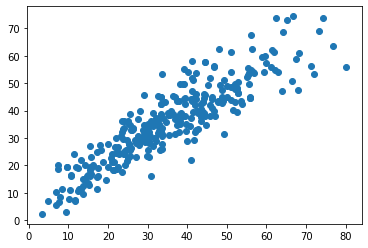

In [ ]:
plt.scatter(y_test, predictions)

0.24948853883071187


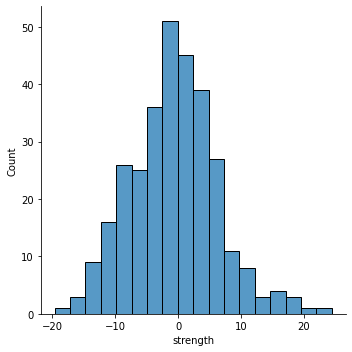

In [ ]:
print(skew(y_test - predictions))
sns.displot(y_test - predictions)

In [ ]:
from sklearn import metrics
metrics.mean_squared_error(y_test, predictions)


48.842026393049764

In [ ]:
b0 = model.intercept_
b1, b2, b3, b4, b5, b6, b7, b8 = model.coef_
b0, b1, b2, b3, b4, b5, b6, b7, b8

(4.148464520085781,
 0.09263727408234505,
 2.392712956964169,
 0.36664503393312114,
 -0.1981853205197534,
 2.37607268989824,
 0.004909169483022668,
 -0.003118083749446665,
 8.963230335461294)